**Step 1 - Library Installation**

In [ ]:
!pip install diffusers transformers

**Step 2 - Load the pretained diffusion models**

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "sd-legacy/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

**Step 3 - Text-to-Image Generation**

In [ ]:
#prompt = "a photo of an astronaut riding a horse on mars"
prompt = "a photo of a boy having coffee at starbucks"
image = pipe(prompt).images[0]

image.save("coffee_boy.png")

  0%|          | 0/50 [00:00<?, ?it/s]

**Step 4 - Visualise the image**

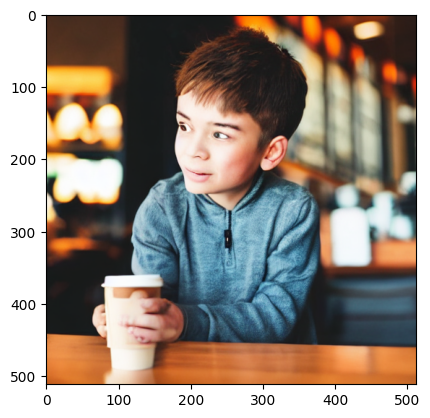

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_read = cv2.imread('/content/coffee_boy.png')
image_read = cv2.cvtColor(image_read , cv2.COLOR_BGR2RGB)

plt.imshow(image_read)
plt.show()

**Step 5 - Build a web based Image generator**

In [ ]:
import gradio as gr

def generate_image(prompt):
  image = pipe(prompt).images[0]
  return image

gr.Interface(fn = generate_image, inputs = "text" , outputs="image" , title="Image Generator").launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e0fde363e8d1bf8b7e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")

# if using torch < 2.0
# pipe.enable_xformers_memory_efficient_attention()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/5.14G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.34.0",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
prompt = "a photo of a boy having coffee at starbucks"

images = pipe(prompt=prompt).images[0]
images.save("coffee_boy.png")

  0%|          | 0/50 [00:00<?, ?it/s]

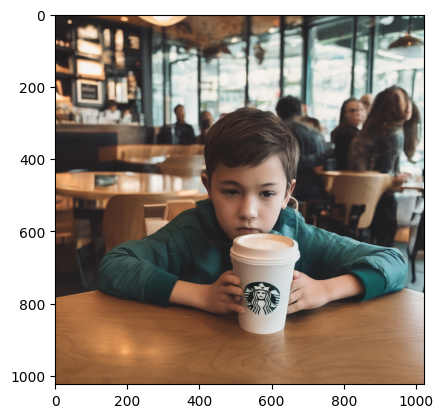

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_read = cv2.imread('/content/coffee_boy.png')
image_read = cv2.cvtColor(image_read , cv2.COLOR_BGR2RGB)

plt.imshow(image_read)
plt.show()

**Access gated Repository**

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
import torch
from diffusers import FluxPipeline

pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-dev", torch_dtype=torch.bfloat16)
pipe.enable_model_cpu_offload() #save some VRAM by offloading the model to CPU. Remove this if you have enough GPU power
#pipe.to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 23 files:   0%|          | 0/23 [00:00<?, ?it/s]

transformer/diffusion_pytorch_model-0000(…):   0%|          | 0.00/9.95G [00:00<?, ?B/s]

transformer/diffusion_pytorch_model-0000(…):   0%|          | 0.00/9.98G [00:00<?, ?B/s]

text_encoder_2/model-00002-of-00002.safe(…):   0%|          | 0.00/4.53G [00:00<?, ?B/s]

transformer/diffusion_pytorch_model-0000(…):   0%|          | 0.00/3.87G [00:00<?, ?B/s]

text_encoder_2/model-00001-of-00002.safe(…):   0%|          | 0.00/4.99G [00:00<?, ?B/s]

In [ ]:
prompt = "A cat holding a sign that says hello world"
image = pipe(
    prompt,
    height=1024,
    width=1024,
    guidance_scale=3.5,
    num_inference_steps=50,
    max_sequence_length=512,
    generator=torch.Generator("cpu").manual_seed(0)
).images[0]
image.save("flux-dev.png")


**Qwen**

In [ ]:
!pip install git+https://github.com/huggingface/diffusers

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-06zko4_h
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-06zko4_h
  Resolved https://github.com/huggingface/diffusers to commit 58bf2682612bc29b7cdb8a10ba6eee28a024d6d3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.35.0.dev0-py3-none-any.whl size=4109735 sha256=bd48b7479b31582ce6d1168a26ba67808d89d57641c81de0a17c772bbef3b688
  Stored in directory: /tmp/pip-ephem-wheel-cache-xugpe171/wheels/90/fb/48/a310c271ab42899362ff272062ced42133e5c4c9d0ce77df68
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.34.0
    Uninstalling diffusers-0.34.0:
      Successfully uninstalled diffusers-0.34.0


In [ ]:
from diffusers import DiffusionPipeline
import torch

model_name = "Qwen/Qwen-Image"

# Load the pipeline
if torch.cuda.is_available():
    torch_dtype = torch.bfloat16
    device = "cuda"
else:
    torch_dtype = torch.float32
    device = "cpu"

pipe = DiffusionPipeline.from_pretrained(model_name, torch_dtype=torch_dtype)
pipe = pipe.to(device)

positive_magic = {
    "en": "Ultra HD, 4K, cinematic composition." # for english prompt
}


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 27 files:   0%|          | 0/27 [00:00<?, ?it/s]

text_encoder/model-00003-of-00004.safete(…):   0%|          | 0.00/4.93G [00:00<?, ?B/s]

text_encoder/model-00004-of-00004.safete(…):   0%|          | 0.00/1.69G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/485 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

text_encoder/model-00002-of-00004.safete(…):   0%|          | 0.00/4.99G [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/605 [00:00<?, ?B/s]

text_encoder/model-00001-of-00004.safete(…):   0%|          | 0.00/4.97G [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

transformer/diffusion_pytorch_model-0000(…):   0%|          | 0.00/4.99G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/371 [00:00<?, ?B/s]

transformer/diffusion_pytorch_model-0000(…):   0%|          | 0.00/4.98G [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

transformer/diffusion_pytorch_model-0000(…):   0%|          | 0.00/4.95G [00:00<?, ?B/s]

transformer/diffusion_pytorch_model-0000(…):   0%|          | 0.00/4.98G [00:00<?, ?B/s]

transformer/diffusion_pytorch_model-0000(…):   0%|          | 0.00/4.95G [00:00<?, ?B/s]

**Step 6 - Generate image with Qwen model**

In [ ]:
prompt = "a photo of a boy having coffee at starbucks"

# You can use the positive_magic dictionary to add magic words to your prompt.
# For example, if your prompt is in English:
# prompt = prompt + positive_magic["en"]

image = pipe(prompt=prompt).images[0]
image.save("qwen_coffee_boy.png")

In [ ]:
# Generate image
prompt = '''A coffee shop entrance features a chalkboard sign reading "Qwen Coffee 😊 $2 per cup," with a neon light beside it displaying "通义千问". Next to it hangs a poster showing a beautiful Chinese woman, and beneath the poster is written "π≈3.1415926-53589793-23846264-33832795-02384197". Ultra HD, 4K, cinematic composition'''

negative_prompt = " " # using an empty string if you do not have specific concept to remove


# Generate with different aspect ratios
aspect_ratios = {
    "1:1": (1328, 1328),
    "16:9": (1664, 928),
    "9:16": (928, 1664),
    "4:3": (1472, 1140),
    "3:4": (1140, 1472),
    "3:2": (1584, 1056),
    "2:3": (1056, 1584),
}

width, height = aspect_ratios["16:9"]

image = pipe(
    prompt=prompt + positive_magic["en"],
    negative_prompt=negative_prompt,
    width=width,
    height=height,
    num_inference_steps=50,
    true_cfg_scale=4.0,
    generator=torch.Generator(device="cuda").manual_seed(42)
).images[0]

image.save("example.png")